Plot saved as ../assets/affirmative-action/overlapping_gaussians.png


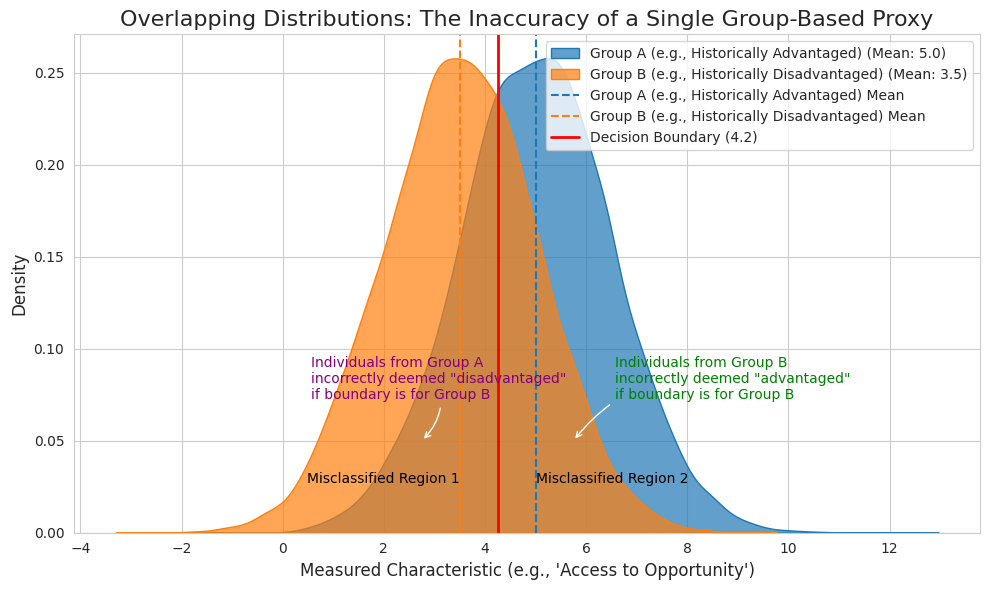

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For a slightly nicer aesthetic and KDE plots

def plot_gaussians(mean1, std1, label1, mean2, std2, label2, title, filename, highlight_decision_boundary=False, decision_threshold=None):
    """
    Generates and saves a plot of two Gaussian distributions.

    Args:
        mean1 (float): Mean of the first Gaussian.
        std1 (float): Standard deviation of the first Gaussian.
        label1 (str): Label for the first Gaussian.
        mean2 (float): Mean of the second Gaussian.
        std2 (float): Standard deviation of the second Gaussian.
        label2 (str): Label for the second Gaussian.
        title (str): Title of the plot.
        filename (str): Filename to save the plot.
        highlight_decision_boundary (bool): Whether to highlight a decision boundary.
        decision_threshold (float, optional): The x-value for the decision boundary.
                                              If None and highlight_decision_boundary is True,
                                              it will be placed at the mean of the first group.
    """
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # Generate data
    s1 = np.random.normal(mean1, std1, 10000)
    s2 = np.random.normal(mean2, std2, 10000)

    # Plot KDEs
    sns.kdeplot(s1, fill=True, label=f'{label1} (Mean: {mean1:.1f})', alpha=0.7)
    sns.kdeplot(s2, fill=True, label=f'{label2} (Mean: {mean2:.1f})', alpha=0.7)

    # Add vertical lines for means
    plt.axvline(mean1, color=sns.color_palette()[0], linestyle='--', label=f'{label1} Mean')
    plt.axvline(mean2, color=sns.color_palette()[1], linestyle='--', label=f'{label2} Mean')

    if highlight_decision_boundary:
        if decision_threshold is None:
            decision_threshold = (mean1 + mean2)/2 # Default decision boundary at mean of first group
        plt.axvline(decision_threshold, color='red', linestyle='-', linewidth=2, label=f'Decision Boundary ({decision_threshold:.1f})')

        # Illustrate misclassification (conceptual)
        # For s1 (Group A - supposedly advantaged)
        # False Negatives for Group A if boundary is to help "disadvantaged" Group B
        # (i.e. those in Group A below threshold who might be considered disadvantaged)
        # For s2 (Group B - supposedly disadvantaged)
        # False Positives for Group B if boundary is to help "disadvantaged" Group B
        # (i.e. those in Group B above threshold who might be considered advantaged)

        # This is harder to shade perfectly with KDEs without more complex calculations.
        # The visual overlap and the decision boundary line itself should convey the point.
        # We can add text annotations for clarity.
        plt.text(decision_threshold - (std1*0.5), plt.gca().get_ylim()[1]*0.1, 'Misclassified Region 1', color='black', ha='right')
        plt.text(decision_threshold + (std2*0.5), plt.gca().get_ylim()[1]*0.1, 'Misclassified Region 2', color='black', ha='left')
        plt.annotate('Individuals from Group A\nincorrectly deemed "disadvantaged"\nif boundary is for Group B',
                     xy=(decision_threshold - std1, 0.05), xycoords='data',
                     xytext=(-80, 30), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3"), color='purple')
        plt.annotate('Individuals from Group B\nincorrectly deemed "advantaged"\nif boundary is for Group B',
                     xy=(decision_threshold + std2, 0.05), xycoords='data',
                     xytext=(30, 30), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"), color='green')


    plt.title(title, fontsize=16)
    plt.xlabel("Measured Characteristic (e.g., 'Access to Opportunity')", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(filename)
    print(f"Plot saved as {filename}")
    plt.show()

# --- Generate Plot 1: Overlapping Gaussians ---
# (This is the one you described for the main argument)
plot_gaussians(mean1=5.0, std1=1.5, label1="Group A (e.g., Historically Advantaged)",
               mean2=3.5, std2=1.5, label2="Group B (e.g., Historically Disadvantaged)",
               title="Overlapping Distributions: The Inaccuracy of a Single Group-Based Proxy",
               filename="../assets/affirmative-action/overlapping_gaussians.png",
               highlight_decision_boundary=True) # Boundary at mean of Group B


Plot saved as ../assets/affirmative-action/separated_gaussians.png


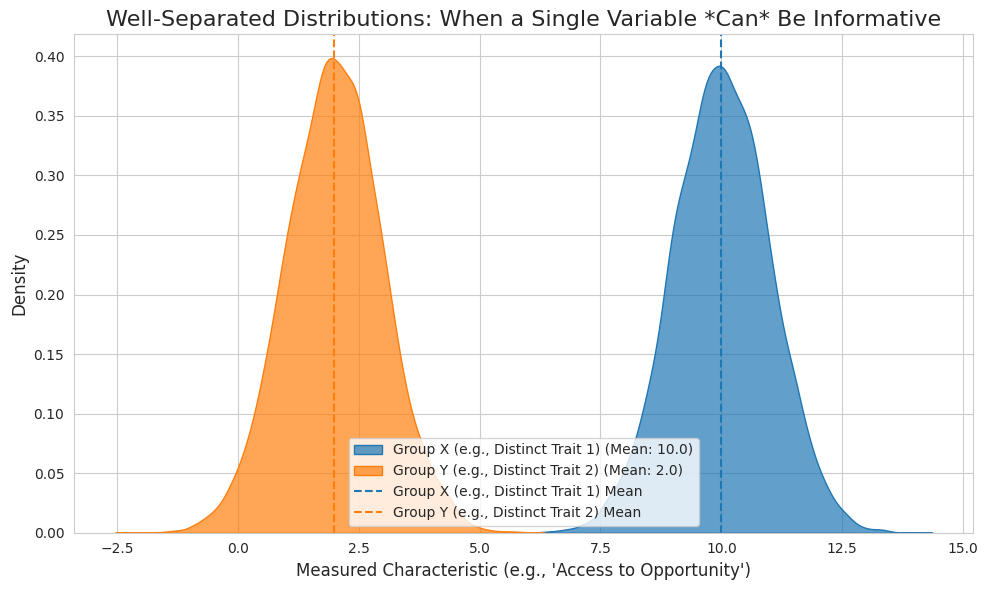

In [4]:

# --- Generate Plot 2: Well-Separated Gaussians ---
plot_gaussians(mean1=10.0, std1=1.0, label1="Group X (e.g., Distinct Trait 1)",
               mean2=2.0, std2=1.0, label2="Group Y (e.g., Distinct Trait 2)",
               title="Well-Separated Distributions: When a Single Variable *Can* Be Informative",
               filename="../assets/affirmative-action/separated_gaussians.png")